In [1]:
import sys
sys.path.append('/reg/neh/home/haoyuan/Documents/my_repos/Arsenal/')

import arsenal
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import time

# Define Some parameters

In [2]:
run_num = 176

# Load the patterns

In [3]:
with h5.File('/reg/d/psdm/amo/amox34117/scratch/haoyuan/experiment_data/amox34117_run_176_selection_based_on_psocake.h5') as h5file:
    # Get batch_num
    batch_num = int(len(list(h5file.keys()))//2)
    
    # Loop through all the batch
    holder = []
    for l in range(batch_num):
        holder.append(np.array(h5file['batch_{}_pattern'.format(l)]))
        
patterns = np.concatenate(holder, axis = 0)

# Load the simulation patterns

In [1]:
with h5.File('/reg/d/psdm/amo/amox34117/scratch/haoyuan/pysingfel/output/normalized_2d_pattern.h5','r') as h5file:
    distributions = np.array(h5file['patterns'])

NameError: name 'h5' is not defined

# Load the mask

In [5]:
mask_bool = np.load('../../output/mask_2d_bool_roi_round_1.npy')

# Apply the mask to the arrays

In [6]:
pattern_num = patterns.shape[0]
holder = []

for l in range(pattern_num):
    tmp = patterns[l]
    holder.append(tmp[mask_bool])

pattern_masked = np.vstack(holder)

In [7]:
distribution_num = distributions.shape[0]
holder = []

for l in range(distribution_num):
    tmp = distributions[l]
    holder.append(tmp[mask_bool[:, :122]])

distribution_masked = np.vstack(holder)

# Calculate the modified correlation

In [8]:
tic = time.time()

# Calculate the intensity
intensity = np.sum(pattern_masked, axis=-1)

# Summation of the masked distribution
distri_sum = np.sum(distribution_masked, axis=-1)

# Process the patterns
pattern_masked /= intensity[:, np.newaxis]
np.sqrt(pattern_masked, out=pattern_masked)

# Process the distributions
distribution_masked /= distri_sum[:, np.newaxis]
np.sqrt(distribution_masked, out=distribution_masked)

# Calculate the inner product
inner_prod = np.matmul(pattern_masked, distribution_masked.T)

# Normalize with the intensity
# inner_prod /= intensity[:, np.newaxis]

# Get the largest values and the corresponding index
largest_values = np.max(inner_prod, axis=-1)
largest_values_index = np.argmax(inner_prod, axis=-1)

toc = time.time()
print('It takes {:.2f} seconds to calculate'.format(toc - tic) +
      'the optimal modified correlation for ' +
      '{} patterns versus {} orientations'.format(pattern_masked.shape[0],
                                                  distribution_masked.shape[0]))


It takes 6.27 seconds to calculatethe optimal modified correlation for 4230 patterns versus 10860 orientations


# Save the results

In [9]:
with h5.File('../../output/run_{}_modified_correlation.h5'.format(run_num), 'w') as h5file:
    h5file.create_dataset('patterns', data=patterns)
    # h5file.create_dataset('patterns_masked', data= pattern_masked)
    h5file.create_dataset('distributions', data=distributions)
    # h5file.create_dataset('distribution_masked', data= distribution_masked)
    h5file.create_dataset('modified_correlation', data=largest_values)
    h5file.create_dataset('distribution_idx', data=largest_values_index)
    h5file.create_dataset('intensity', data=intensity)
    h5file.create_dataset('mask', data=mask_bool)


# Visualizing the results

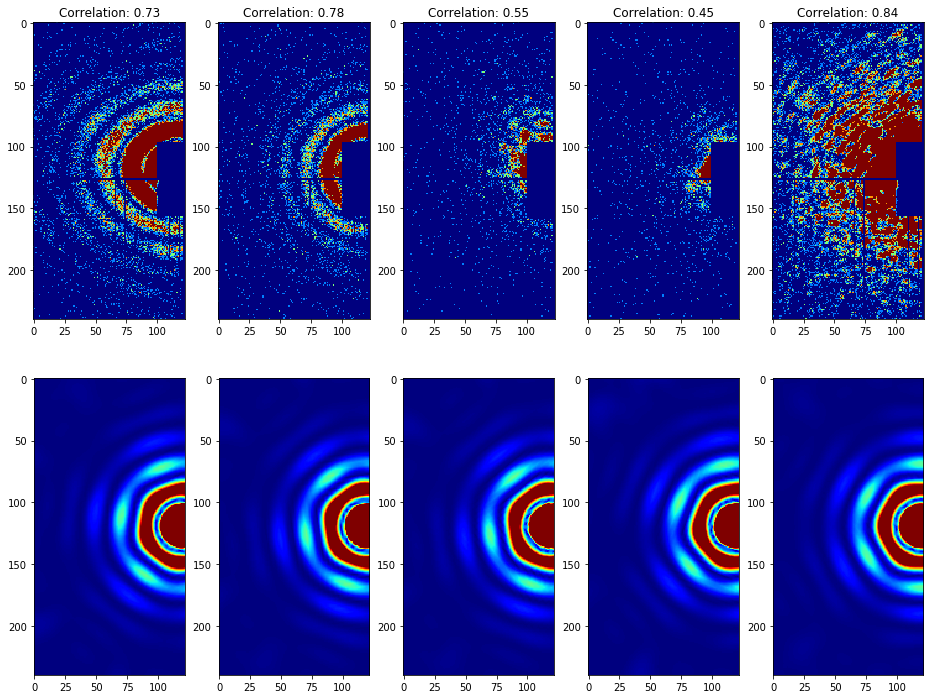

In [11]:
col_num = 5
pat_idx = [345,346,347,348,200]
dis_idx = largest_values_index[pat_idx]

# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=col_num)
fig.set_figheight(12)
fig.set_figwidth(16)

# Plot the patterns
for l in range(col_num):
    axes[1, l].imshow(distributions[dis_idx[l]], cmap='jet', vmax = 1e-4)
    axes[0, l].imshow(patterns[pat_idx[l]],  cmap='jet', vmax=4)
    axes[0, l].set_title('Correlation: {:.2f}'.format(largest_values[pat_idx[l]]))
    
# Show the canvas
plt.show()

In [29]:
log_likelihood.shape

(4230, 4230)

In [43]:
dis_holder = np.copy(patterns)
dis_holder[patterns>=1] = 1
dis_holder[patterns<0.5] = -1

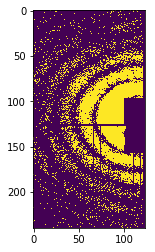

In [52]:
plt.imshow(dis_holder[345])
plt.show()